In [1]:
import sys
sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import plots
from packages import general, bh

In [2]:
num_particles = 100

n_crits = np.arange(2, 30, 4)

theta = 0.5
terms = 3

In [3]:
particles = [general.Particle(mass_like=True) for _ in range(num_particles)]

times = []

for n_crit in n_crits:
    print(f'n_crit: {n_crit}')
    method = bh.BH(particles, theta, terms, n_crit)
    time = %timeit -o method.do_method()
    times.append(time)

n_crit: 2
30.5 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
n_crit: 6
23.2 ms ± 250 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
n_crit: 10
19.9 ms ± 414 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
n_crit: 14
19.9 ms ± 187 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n_crit: 18
19.8 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
n_crit: 22
21.3 ms ± 415 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
n_crit: 26
23.2 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
averages = [time.average for time in times]
stdevs = [time.stdev for time in times]

In [5]:
FILE_PATH = 'data/n_crit100.npz'
np.savez(FILE_PATH,
    num_particles=num_particles,
    theta=theta,
    terms=terms,
    averages=averages,
    stdevs=stdevs,
    n_crits=n_crits
)

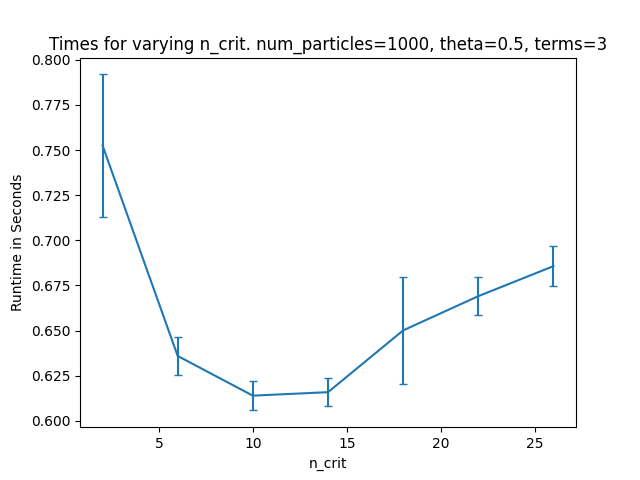

In [7]:
FILE_PATH = 'data/n_crit.npz'
fig = plots.n_crit(FILE_PATH)